In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline

In [116]:
df = pd.read_csv("laptop_data.csv")

In [117]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [118]:
df.shape

(1303, 12)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [120]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [121]:
missing_values = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()

In [122]:
missing_values.head()

,index,0
0,Unnamed: 0,0.0
1,Company,0.0
2,TypeName,0.0
3,Inches,0.0
4,ScreenResolution,0.0


C:\Users\sumedh.shende\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


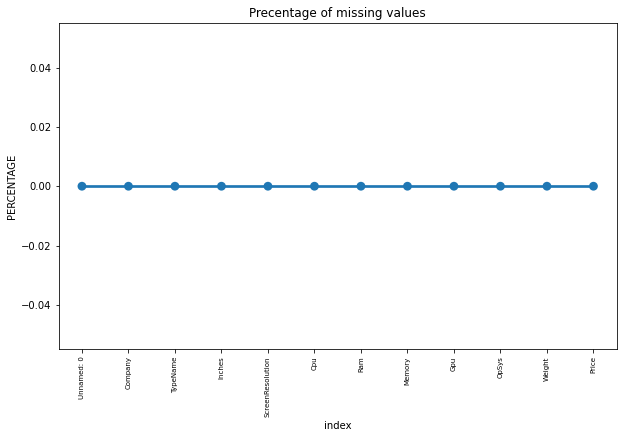

In [123]:
plt.figure(figsize = (10,6))

ax = sns.pointplot('index',0,data=missing_values)
plt.xticks(rotation=90, fontsize = 7)
plt.title("Precentage of missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [124]:
df.duplicated().sum()

0

In [125]:
df.drop(columns='Unnamed: 0',inplace = True)

In [126]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [127]:
#Removing GB and kg from Ram and Weight
df['Ram'] = df['Ram'].str.replace('GB',"")
df['Weight'] = df['Weight'].str.replace('kg',"")

In [128]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [129]:
# change cols Ram and weight dtype to int

df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


C:\Users\sumedh.shende\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

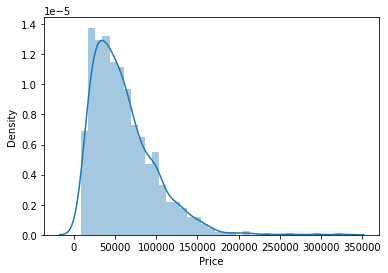

In [131]:
sns.distplot(df['Price'])

In [132]:
df['Company'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Vero           4
Xiaomi         4
Google         3
Chuwi          3
LG             3
Fujitsu        3
Huawei         2
Name: Company, dtype: int64

<AxesSubplot:>

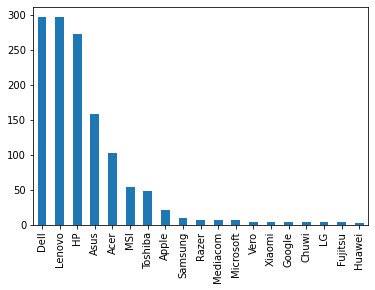

In [133]:
df['Company'].value_counts().plot(kind='bar')

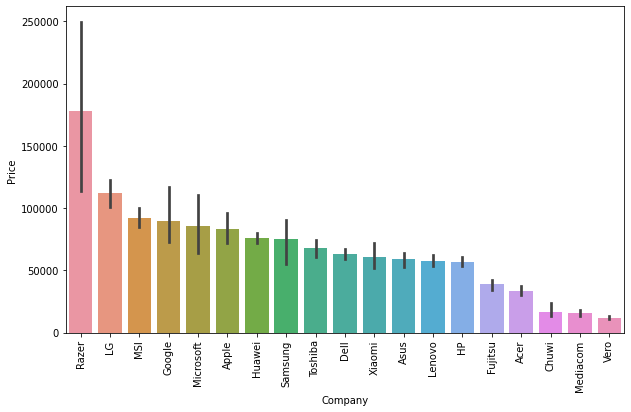

In [134]:
plt.figure(figsize = (10,6))

result = df.groupby(['Company'])['Price'].aggregate(np.mean).reset_index().sort_values('Price',ascending=False)
sns.barplot(x='Company',y='Price',data=df, order=result['Company'])
plt.xticks(rotation='vertical')
plt.show()

In [135]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


<AxesSubplot:>

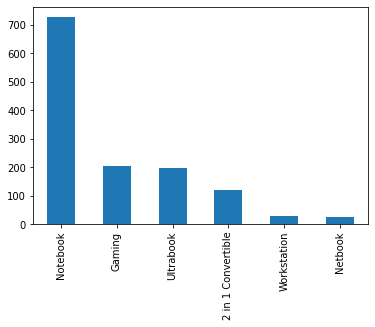

In [136]:
df['TypeName'].value_counts().plot(kind='bar')

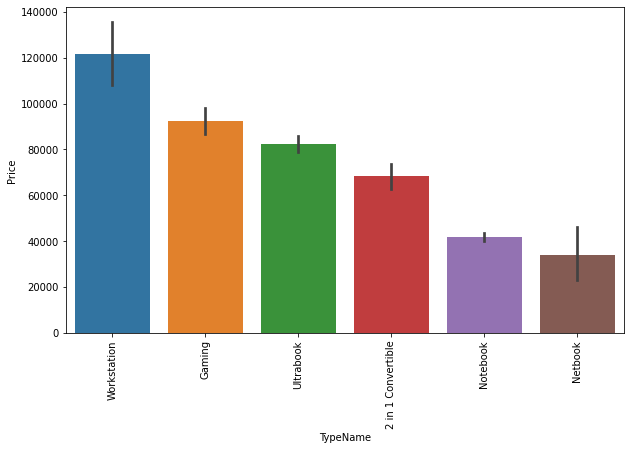

In [137]:
plt.figure(figsize=(10,6))

bar_order = df.groupby(['TypeName'])['Price'].aggregate(np.mean).reset_index().sort_values('Price', ascending=False)

sns.barplot(x='TypeName',y='Price', data=df,order=bar_order['TypeName'])
plt.xticks(rotation='vertical')
plt.show()

In [138]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [139]:
df['Inches'].value_counts()

15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
13.5      6
13.9      6
12.0      6
12.3      5
10.1      4
15.0      4
15.4      4
13.0      2
11.3      1
14.1      1
17.0      1
18.4      1
Name: Inches, dtype: int64

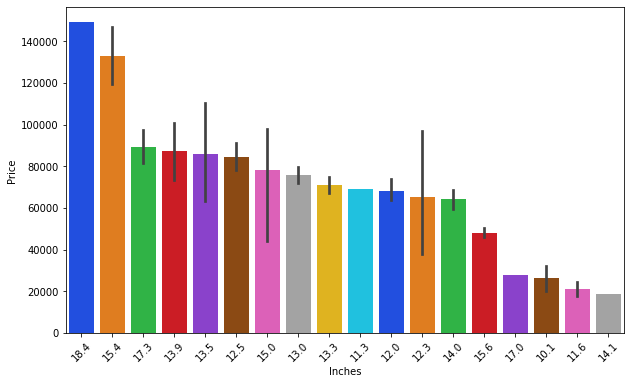

In [140]:
plt.figure(figsize=(10,6))

inch_order = df.groupby('Inches')['Price'].aggregate(np.mean).reset_index().sort_values('Price', ascending=False)
sns.barplot(x='Inches',y="Price", data=df,order=inch_order['Inches'], palette='bright')
plt.xticks(rotation=45)
plt.show()

In [141]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Touchscreen 2560x1440               

In [142]:
# Find touchscreen laptops and create a new column for Touchscreen

df['Touchcreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

In [143]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchcreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


<AxesSubplot:>

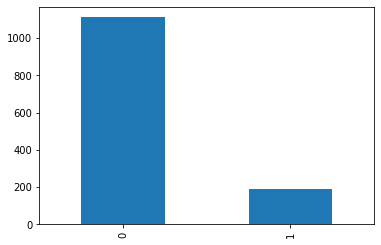

In [144]:
df['Touchcreen'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Touchcreen', ylabel='Price'>

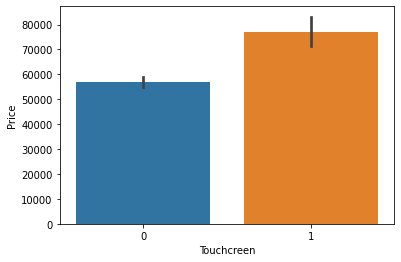

In [145]:
sns.barplot(x = df['Touchcreen'], y= df['Price'])

In [146]:
# Find IPS laptops and create a new column for Touchscreen

df['IPS'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

<AxesSubplot:>

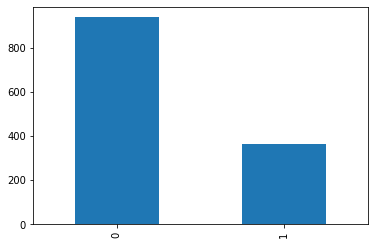

In [147]:
df['IPS'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='IPS', ylabel='Price'>

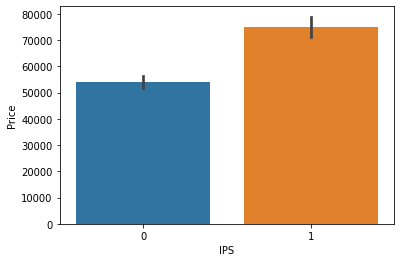

In [148]:
sns.barplot(x = df['IPS'], y=df['Price'])

In [149]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchcreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


In [150]:
new = df['ScreenResolution'].str.split('x',n=1, expand=True)

In [151]:
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [152]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchcreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [153]:
df['X_res']=df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)+').apply(lambda x: x[0])

In [154]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchcreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [155]:
df['X_res'].value_counts()

1920    846
1366    308
3840     43
2560     29
3200     27
1600     23
2304      6
2256      6
2400      4
1440      4
2880      4
2160      2
2736      1
Name: X_res, dtype: int64

In [156]:
df['X_res'] = df['X_res'].astype('int32')
df['Y_res'] = df['Y_res'].astype('int32')

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchcreen        1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [158]:
# There is a strong correlation between Price ans resolution
df.corr()['Price']

Inches        0.068197
Ram           0.743007
Weight        0.210370
Price         1.000000
Touchcreen    0.191226
IPS           0.252208
X_res         0.556529
Y_res         0.552809
Name: Price, dtype: float64

In [159]:
# let'sfind ppi using inches, X_res and y_res

df['ppi']=(((df['X_res']**2+df['Y_res']**2)**0.5)/df['Inches']).astype('float')

In [160]:
# There is a strong correlation between price and ppi
df.corr()['Price'] 

Inches        0.068197
Ram           0.743007
Weight        0.210370
Price         1.000000
Touchcreen    0.191226
IPS           0.252208
X_res         0.556529
Y_res         0.552809
ppi           0.473487
Name: Price, dtype: float64

In [161]:
df.drop(columns=['ScreenResolution', 'Inches','X_res','Y_res'], inplace=True)

In [162]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchcreen,IPS,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [163]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz              190
Intel Core i7 7700HQ 2.8GHz             146
Intel Core i7 7500U 2.7GHz              134
Intel Core i7 8550U 1.8GHz               73
Intel Core i5 8250U 1.6GHz               72
                                       ... 
Intel Core i7 2.7GHz                      1
Intel Core i5 7200U 2.7GHz                1
Intel Pentium Dual Core N4200 1.1GHz      1
Intel Core i3 6006U 2.2GHz                1
Intel Atom x5-Z8300 1.44GHz               1
Name: Cpu, Length: 118, dtype: int64

In [164]:
df['Cpu Name'] = df['Cpu'].apply(lambda x: " ".join(x.split()[0:3]))

In [165]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchcreen,IPS,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [166]:
df['Cpu Name'].unique()

array(['Intel Core i5', 'Intel Core i7', 'AMD A9-Series 9420',
       'Intel Core i3', 'Intel Core M', 'Intel Atom x5-Z8350',
       'AMD E-Series E2-9000e', 'Intel Atom x5-Z8300',
       'AMD E-Series E2-6110', 'AMD A6-Series 9220', 'Intel Celeron Dual',
       'AMD Ryzen 1700', 'Intel Pentium Quad', 'Intel Atom x5-Z8550',
       'AMD FX 9830P', 'AMD E-Series 6110', 'Intel Xeon E3-1505M',
       'AMD E-Series 9000e', 'AMD A10-Series A10-9620P',
       'AMD A6-Series A6-9220', 'AMD A10-Series 9600P',
       'AMD A8-Series 7410', 'AMD A12-Series 9720P', 'Intel Celeron Quad',
       'AMD Ryzen 1600', 'AMD A10-Series 9620P', 'AMD E-Series 7110',
       'AMD A9-Series A9-9420', 'Intel Xeon E3-1535M',
       'AMD E-Series E2-9000', 'AMD A6-Series 7310', 'Intel Atom Z8350',
       'Intel Pentium Dual', 'AMD A12-Series 9700P', 'AMD A4-Series 7210',
       'AMD FX 8800P', 'Intel Atom X5-Z8350', 'Samsung Cortex A72&A53',
       'AMD E-Series 9000', 'AMD A9-Series 9410'], dtype=object)

In [167]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [168]:
df['Cpu Brand'] = df['Cpu Name'].apply(fetch_processor)

<AxesSubplot:>

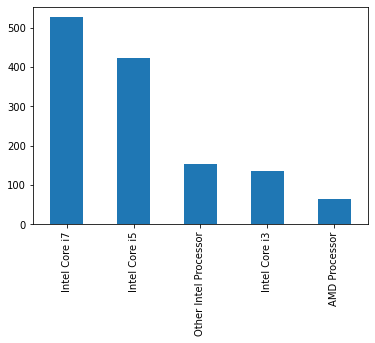

In [169]:
df['Cpu Brand'].value_counts().plot(kind = 'bar')

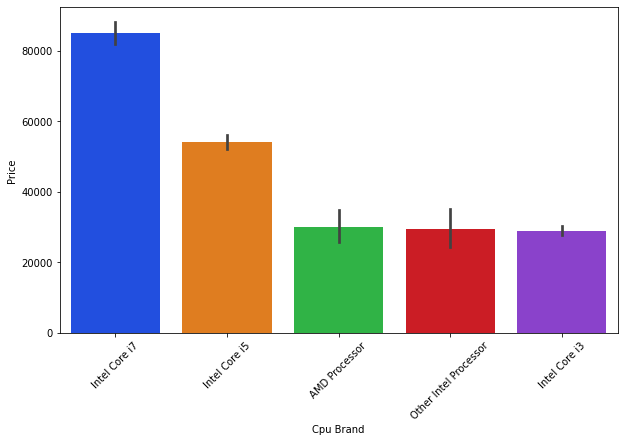

In [170]:
plt.figure(figsize=(10,6))

brand_new = df.groupby('Cpu Brand')['Price'].aggregate(np.mean).reset_index().sort_values('Price', ascending=False)
sns.barplot(x = 'Cpu Brand', y = 'Price', data = df, order = brand_new['Cpu Brand'], palette='bright')
plt.xticks(rotation=45)
plt.show()

In [171]:
df.drop(columns=['Cpu','Cpu Name'], inplace=True)

In [172]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchcreen,IPS,ppi,Cpu Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


<AxesSubplot:>

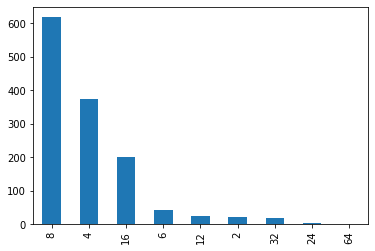

In [173]:
df['Ram'].value_counts().plot(kind = 'bar')

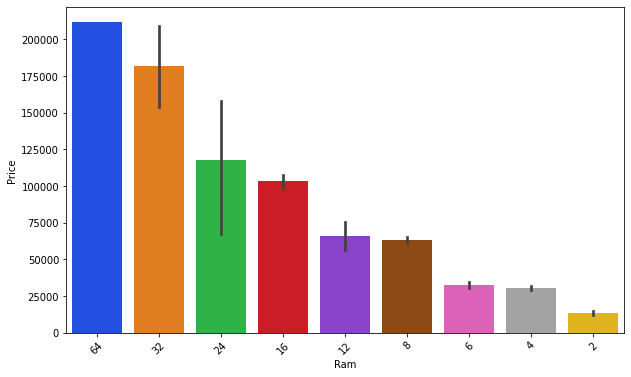

In [174]:
# there is a linear relationship between Ram and price
plt.figure(figsize=(10,6))

Ram_order = df.groupby('Ram')['Price'].aggregate(np.mean).reset_index().sort_values('Price', ascending=False)

sns.barplot(x='Ram',y='Price', data = df,order=Ram_order['Ram'], palette='bright')
plt.xticks(rotation='45')
plt.show()

In [175]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
1TB SSD +  1TB HDD                 2
512GB Flash Storage                2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  512GB SSD             1
5

In [176]:
df['Memory']=df['Memory'].astype(str).replace('\.0','', regex=True)
df['Memory']=df['Memory'].str.replace('GB',"")
df['Memory']=df['Memory'].str.replace('TB',"000")
new = df['Memory'].str.split('+',n=1, expand = True)

In [177]:
df['first']=new[0]
df['first']=df['first'].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

<ipython-input-177-353b121d8c0f>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')
<ipython-input-177-353b121d8c0f>:20: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')


In [178]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchcreen,IPS,ppi,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [179]:
df['Memory'].value_counts()

256 SSD                         412
1000 HDD                        224
500 HDD                         132
512 SSD                         118
128 SSD +  1000 HDD              94
128 SSD                          76
256 SSD +  1000 HDD              73
32 Flash Storage                 38
2000 HDD                         16
64 Flash Storage                 15
512 SSD +  1000 HDD              14
1000 SSD                         14
256 SSD +  2000 HDD              10
1000 Hybrid                       9
256 Flash Storage                 8
16 Flash Storage                  7
32 SSD                            6
180 SSD                           5
128 Flash Storage                 4
512 SSD +  2000 HDD               3
16 SSD                            3
256 SSD +  256 SSD                2
512 Flash Storage                 2
1000 SSD +  1000 HDD              2
256 SSD +  500 HDD                2
128 SSD +  2000 HDD               2
128 HDD                           1
240 SSD                     

In [180]:
df.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchcreen       0.191226
IPS              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [181]:
df.drop(columns=['Hybrid','Flash_Storage'], inplace=True)

In [182]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchcreen,IPS,ppi,Cpu Brand,HDD,SSD
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


In [183]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 M315           1
AMD R17M-M1-70               1
Intel Graphics 620           1
AMD R4 Graphics              1
Intel HD Graphics 530        1
Name: Gpu, Length: 110, dtype: int64

In [184]:
df['Gpu brand']=df['Gpu'].apply(lambda x: x.split()[0])

In [185]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [186]:
df = df[df['Gpu brand'] != 'ARM']

In [187]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu brand, dtype: int64

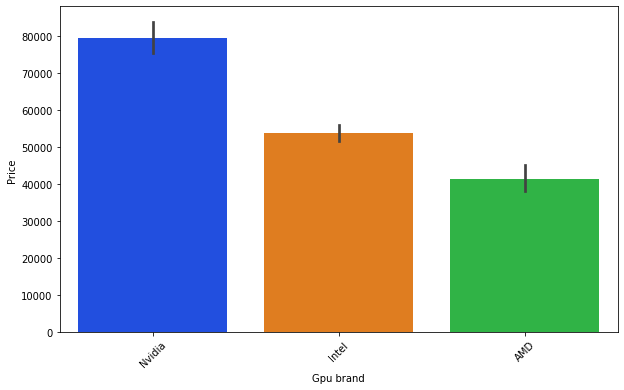

In [188]:
plt.figure(figsize=(10,6))

gpu_new = df.groupby('Gpu brand')['Price'].aggregate(np.mean).reset_index().sort_values('Price', ascending = False)

sns.barplot(x='Gpu brand', y='Price', data = df,order=gpu_new['Gpu brand'], palette='bright')
plt.xticks(rotation = 45)
plt.show()

In [189]:
df.drop(columns='Gpu', inplace=True)

In [190]:
df.drop(columns='Memory', inplace=True)

In [191]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchcreen,IPS,ppi,Cpu Brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [192]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [193]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp =='Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [194]:
df['os'] = df['OpSys'].apply(cat_os)

In [195]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchcreen,IPS,ppi,Cpu Brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [196]:
df.drop(columns=['OpSys'], inplace=True)

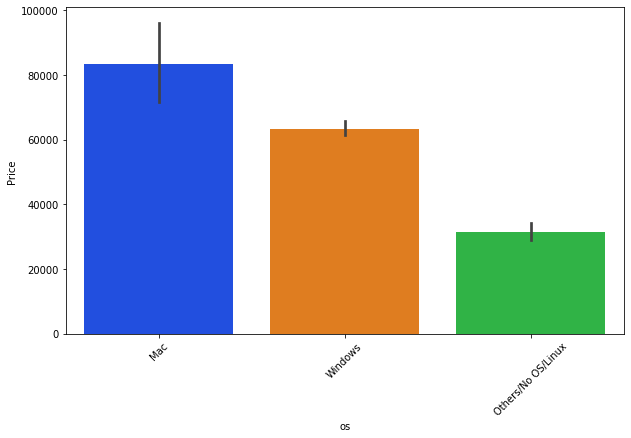

In [197]:
plt.figure(figsize=(10,6))

gpu_new = df.groupby('os')['Price'].aggregate(np.mean).reset_index().sort_values('Price', ascending = False)

sns.barplot(x='os', y='Price', data = df,order=gpu_new['os'], palette='bright')
plt.xticks(rotation = 45)
plt.show()

C:\Users\sumedh.shende\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

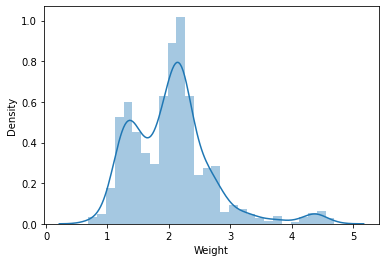

In [198]:
sns.distplot(df['Weight'])

<AxesSubplot:>

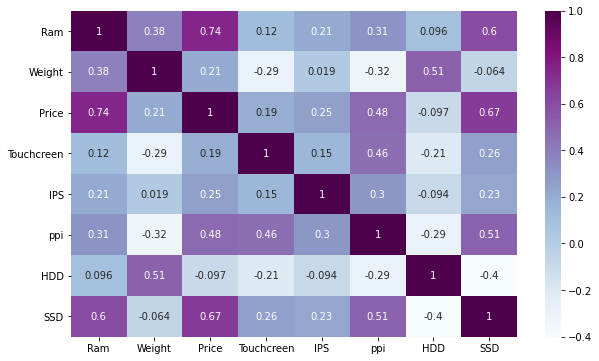

In [199]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="BuPu")

C:\Users\sumedh.shende\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

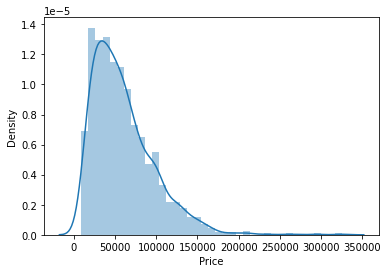

In [200]:
# Target column price is right skewed, so use log transformation
sns.distplot(df['Price'])

C:\Users\sumedh.shende\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

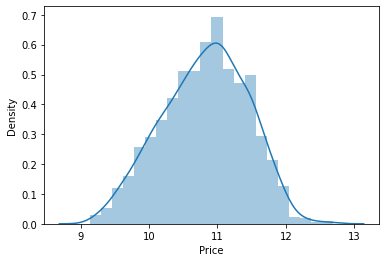

In [201]:
sns.distplot(np.log(df['Price']))

In [202]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [203]:
X.head()

,Company,TypeName,Ram,Weight,Touchcreen,IPS,ppi,Cpu Brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [204]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [205]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15, random_state=2)

In [206]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error

from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

## Linear Regression

In [207]:
'''
Step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),['Company','TypeName','Cpu Brand','Gpu brand','os'])
],remainder='passthrough')


pipe = Pipeline([('step1', Step1),('model',LinearRegression())])


grid_param = [
    {"model":[Lasso()],
    "model__alpha": [float(x) for x in np.linspace(start=0.01,stop=1,num=10)],
    "model__normalize":[True,False]
    },
    {"model":[Ridge()],
     "model__alpha": [float(x) for x in np.linspace(start=0.01,stop=1,num=10)],
     "model__normalize":[True,False]
    },
    {"model":[KNeighborsRegressor()],
     "model__n_neighbors":range(1,10)  
    },
    {"model":[DecisionTreeRegressor()],
     "model__splitter":['best','random'],
     "model__max_depth":[int(x) for x in np.linspace(start=2,stop=8,num=5)]
    },
    {"model":[RandomForestRegressor()],
     "model__n_estimators":[int(x) for x in np.linspace(start=100, stop=120, num=10)],
     "model__max_features":['auto','sqrt'],
     "model__max_depth":[int(x) for x in np.linspace(5, 30, num = 6)]
    },
    {"model":[AdaBoostRegressor()],
     "model__n_estimators":[int(x) for x in np.linspace(start=10, stop=50, num=10)],
     "model__learning_rate":[float(x) for x in np.linspace(start=0.001,stop=1,num=10)]
    }]


gs_new = GridSearchCV(pipe,grid_param,cv = 5, verbose = 0, n_jobs=-1)
best_model=gs_new.fit(X_train,y_train)
'''

'\nStep1 = ColumnTransformer(transformers=[\n    (\'col_tnf\',OneHotEncoder(sparse=False,drop=\'first\'),[\'Company\',\'TypeName\',\'Cpu Brand\',\'Gpu brand\',\'os\'])\n],remainder=\'passthrough\')\n\n\npipe = Pipeline([(\'step1\', Step1),(\'model\',LinearRegression())])\n\n\ngrid_param = [\n    {"model":[Lasso()],\n    "model__alpha": [float(x) for x in np.linspace(start=0.01,stop=1,num=10)],\n    "model__normalize":[True,False]\n    },\n    {"model":[Ridge()],\n     "model__alpha": [float(x) for x in np.linspace(start=0.01,stop=1,num=10)],\n     "model__normalize":[True,False]\n    },\n    {"model":[KNeighborsRegressor()],\n     "model__n_neighbors":range(1,10)  \n    },\n    {"model":[DecisionTreeRegressor()],\n     "model__splitter":[\'best\',\'random\'],\n     "model__max_depth":[int(x) for x in np.linspace(start=2,stop=8,num=5)]\n    },\n    {"model":[RandomForestRegressor()],\n     "model__n_estimators":[int(x) for x in np.linspace(start=100, stop=120, num=10)],\n     "model__ma

In [208]:
'''
print(best_model.best_estimator_)
print("The mean accuracy of the model is:", best_model.score(X_test,y_test))

'''

'\nprint(best_model.best_estimator_)\nprint("The mean accuracy of the model is:", best_model.score(X_test,y_test))\n\n'

## Final Model Selection

In [209]:
Step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

Step2 = RandomForestRegressor(max_depth=30, max_features='sqrt',n_estimators=115)

pipe_RF_Reg = Pipeline([('step1', Step1),('step2',Step2)])

pipe_RF_Reg.fit(X_train,y_train)

y_pred = pipe_RF_Reg.predict(X_test)

print("R2 score:", r2_score(y_test,y_pred))
print("MAE score:",mean_absolute_error(y_test,y_pred))

R2 score: 0.9055563777743676
MAE score: 0.14525886274013014


### Export Model

In [210]:
import pickle

In [211]:
pickle.dump(df, open('df.pkl','wb'))

In [212]:
pickle.dump(pipe_RF_Reg, open("pipe_RF_Reg.pkl",'wb'))

In [213]:
X_train.head(1)

,Company,TypeName,Ram,Weight,Touchcreen,IPS,ppi,Cpu Brand,HDD,SSD,Gpu brand,os
183,Toshiba,Notebook,8,2.0,0,0,100.45467,Intel Core i5,0,128,Intel,Windows


In [214]:
df.head(1)

,Company,TypeName,Ram,Weight,Price,Touchcreen,IPS,ppi,Cpu Brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac


In [215]:
df['HDD'].unique()

array([   0,  500, 1000, 2000,   32,  128], dtype=int64)

In [218]:
print(df['Ram'].unique().sort())

None


In [219]:
sorted(df['Ram'].unique())

[2, 4, 6, 8, 12, 16, 24, 32, 64]

In [220]:
df['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [223]:
df.groupby('Company')['TypeName'].value_counts()

Company    TypeName          
Acer       Notebook               78
           2 in 1 Convertible      8
           Gaming                  8
           Netbook                 5
           Ultrabook               4
Apple      Ultrabook              21
Asus       Notebook               67
           Gaming                 54
           Ultrabook              20
           2 in 1 Convertible     13
           Netbook                 4
Chuwi      Notebook                3
Dell       Notebook              165
           Ultrabook              49
           Gaming                 40
           2 in 1 Convertible     30
           Workstation            11
           Netbook                 2
Fujitsu    Notebook                3
Google     Ultrabook               3
HP         Notebook              184
           Ultrabook              36
           2 in 1 Convertible     19
           Workstation            14
           Gaming                 12
           Netbook                 9
Huawei  